In [2]:
import pandas as pd #Data analysis and Preprocessing
import numpy as np #Linear Algebra
import datetime 
import matplotlib.pyplot as plt #graphing
import seaborn as sns # visualization
import warnings # clean up output


warnings.filterwarnings('ignore')
# we will be importing prediction models from scikit learn later.

In [3]:
data = pd.read_csv("Weather.csv")
#print the table along with datatype of each column
data
print("-------------\n",data.dtypes)

-------------
 Date             object
Max_temp          int64
Avg_temp        float64
Min_temp          int64
Max_Dew           int64
Avg_Dew         float64
Min_Dew           int64
Max_humidity      int64
Avg_humidity    float64
Min_humidity      int64
Max_wind          int64
Avg_wind        float64
Min_wind          int64
Max_pressure    float64
Avg_pressure    float64
Min_pressure    float64
precip          float64
dtype: object


In [4]:
# checking for duplicates in date column
data["Date"].duplicated().any()

np.True_

In [5]:
# this mean we have duplicate in Date column and 
# we cannot simply index using this
data.drop_duplicates(inplace=True, subset=["Date"])

In [6]:
# Now check again for duplicates
data["Date"].duplicated().any()


np.False_

In [7]:
# Now index the table with date, and after that
# change its type to datetime to search efficiently

data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index)
data.index


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
               '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29'],
              dtype='datetime64[ns]', name='Date', length=8678, freq=None)

In [8]:
data.index.year.value_counts().sort_index()

Date
2000    239
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    358
2019    365
2020    359
2021    365
2022    358
2023    365
2024     60
Name: count, dtype: int64

In [9]:
# dimensions of our dataset
print(data.shape)
print("-------------\n Columns are:")
# columns
data.columns

(8678, 16)
-------------
 Columns are:


Index(['Max_temp', 'Avg_temp', 'Min_temp', 'Max_Dew', 'Avg_Dew', 'Min_Dew',
       'Max_humidity', 'Avg_humidity', 'Min_humidity', 'Max_wind', 'Avg_wind',
       'Min_wind', 'Max_pressure', 'Avg_pressure', 'Min_pressure', 'precip'],
      dtype='object')

In [10]:
# Number of Null/NaN Values
data.isna().sum()

Max_temp        0
Avg_temp        0
Min_temp        0
Max_Dew         0
Avg_Dew         0
Min_Dew         0
Max_humidity    0
Avg_humidity    0
Min_humidity    0
Max_wind        0
Avg_wind        0
Min_wind        0
Max_pressure    0
Avg_pressure    0
Min_pressure    0
precip          0
dtype: int64

In [11]:
# Converting temp to celcius for universal understanding.
columns = data.columns.to_list()
for i in columns:
    if 'temp' in i or 'Dew'in i:
        data[i] = ((data[i] - 32)*0.556).round()
data

,Max_temp,Avg_temp,Min_temp,Max_Dew,Avg_Dew,Min_Dew,Max_humidity,Avg_humidity,Min_humidity,Max_wind,Avg_wind,Min_wind,Max_pressure,Avg_pressure,Min_pressure,precip
Date,,,,,,,,,,,,,,,,
2000-01-01,21.0,13.0,7.0,13.0,11.0,7.0,100,87.9,53,5,0.3,0,29.3,29.2,29.2,0.0
2000-01-02,21.0,13.0,10.0,12.0,10.0,8.0,100,82.7,56,6,2.1,0,29.3,29.2,29.2,0.0
2000-01-03,18.0,12.0,6.0,10.0,8.0,6.0,100,81.6,56,6,2.4,0,29.3,29.2,29.1,0.0
2000-01-04,17.0,11.0,8.0,10.0,9.0,7.0,100,85.3,59,7,1.6,0,29.2,29.2,29.1,0.0
2000-01-05,17.0,10.0,-18.0,10.0,7.0,-18.0,100,83.1,0,8,1.1,0,29.3,27.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,25.0,19.0,13.0,7.0,2.0,-8.0,67,38.2,11,10,3.8,0,29.3,29.3,29.2,0.0
2024-02-26,24.0,19.0,15.0,9.0,4.0,-3.0,63,40.0,17,6,2.6,0,29.3,29.2,29.2,0.0
2024-02-27,24.0,18.0,13.0,12.0,7.0,1.0,88,53.5,23,9,5.7,0,29.3,29.2,29.2,0.0


In [12]:
#checking if there are any absurd values 
#in temperature columns since they are essentially 
#the target.
def invalid_temp(dataframe):
    # since our focus is delhi we can set a benchmark
    # of min = -2°C and max = 52°C
    min_temp = -2
    max_temp = 52

    MaxTempAbsurd_values = data[(data['Max_temp'] < min_temp) | (data['Max_temp'] > max_temp)]
    AvgTempAbsurd_values = data[(data['Avg_temp'] < min_temp) | (data['Avg_temp'] > max_temp)]
    MinTempAbsurd_values = data[(data['Min_temp'] < min_temp) | (data['Min_temp'] > max_temp)]

    return pd.concat([MaxTempAbsurd_values,AvgTempAbsurd_values,MinTempAbsurd_values])

bad_values = invalid_temp(data)
print(bad_values)
print("-------------\n for comparision size is: ",data.shape)

            Max_temp  Avg_temp  Min_temp  Max_Dew  Avg_Dew  Min_Dew  \
Date                                                                  
2001-11-25      84.0      20.0     -18.0     17.0      5.0    -18.0   
2002-05-15      96.0      40.0      32.0     25.0     23.0     22.0   
2004-01-05      99.0      11.0       5.0      8.0      7.0      5.0   
2018-10-25      72.0      26.0      18.0     15.0     14.0     11.0   
2000-01-05      17.0      10.0     -18.0     10.0      7.0    -18.0   
...              ...       ...       ...      ...      ...      ...   
2021-01-15      21.0      12.0     -18.0     13.0     10.0    -18.0   
2021-02-26      31.0      23.0     -18.0     17.0     13.0    -18.0   
2021-09-23      31.0      27.0     -18.0     29.0     25.0    -18.0   
2023-01-20      22.0      15.0     -18.0     12.0      8.0    -18.0   
2023-12-20      21.0      14.0     -18.0     12.0      8.0    -18.0   

            Max_humidity  Avg_humidity  Min_humidity  Max_wind  Avg_wind  \


In [13]:
print(f"Conclusion: {int((bad_values.shape[0]/data.shape[0])*100)}% data is absurd!")

Conclusion: 6% data is absurd!


#### **To fix this we have 2 options:-**



1. Dropping these columns.
2. Using forward fill method after replacing the column by NaN.


**Now the approach I chose was to setting to Null and then using forward fill to fill those values.**

The reasons of chosing this approach was because:

1. We can see the null values are occurring randomly and are scatter non uniformly.
2. Maintaining continuity is important for time series models.

In [14]:
# re-defining the function above to set null.
#checking if there are any absurd values 
#in temperature columns since they are essentially 
#the target.
def Validating_invalid_temp(data):
    # since our focus is delhi we can set a benchmark
    # of min = -2°C and max = 52°C
    min_temp = -2
    max_temp = 52

    data["Max_temp"].loc[(data['Max_temp'] < min_temp) | (data['Max_temp'] > max_temp)] = np.nan
    data["Avg_temp"].loc[(data['Avg_temp'] < min_temp) | (data['Avg_temp'] > max_temp)] = np.nan
    data["Min_temp"].loc[(data['Min_temp'] < min_temp) | (data['Min_temp'] > max_temp)] = np.nan

    return data
# Setting them to nan using numpy.
data = Validating_invalid_temp(data)

#check the number of null Values.
data.isna().sum()

Max_temp          4
Avg_temp          0
Min_temp        596
Max_Dew           0
Avg_Dew           0
Min_Dew           0
Max_humidity      0
Avg_humidity      0
Min_humidity      0
Max_wind          0
Avg_wind          0
Min_wind          0
Max_pressure      0
Avg_pressure      0
Min_pressure      0
precip            0
dtype: int64

This shows we have most nan in Min Temp column.
We use forward fill to put previous valid row value in place of the NaN.

In [15]:
data = data.fillna(method="ffill")

data.isna().sum()

Max_temp        0
Avg_temp        0
Min_temp        0
Max_Dew         0
Avg_Dew         0
Min_Dew         0
Max_humidity    0
Avg_humidity    0
Min_humidity    0
Max_wind        0
Avg_wind        0
Min_wind        0
Max_pressure    0
Avg_pressure    0
Min_pressure    0
precip          0
dtype: int64

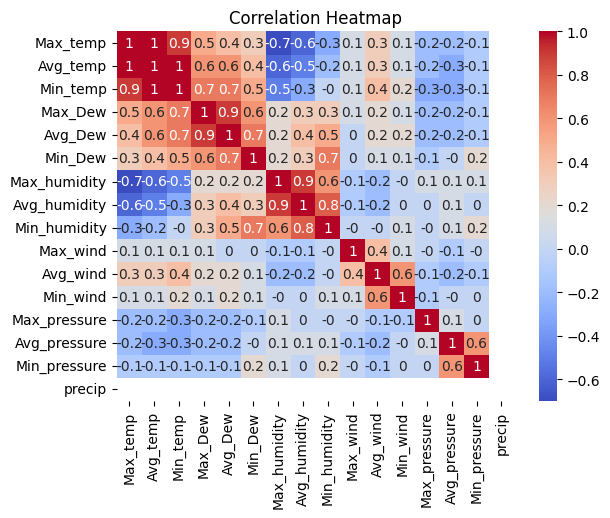

In [16]:
sns.heatmap(data.corr().round(1), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## What this tells?
From this heatmap we can say the degree of change shown in a factor on change of others.

Correlation falls in the range [-1,1] with **negative indicating inverse relation and positive showing the direct relation in the quantity**.

Closer the correlation to 0 the less related these factors are.

**This helps us remove irrelevant features which dont affect our required target.**

we can see that precipitation does not have any role in any calculation because of values mostly being 0 for delhi.

In [17]:
# Lets set a threshold correlation value for 0.4 and for our target
# we choose features where this value is greater than 0.4 or less that -0.4

def filtercolumns(dataframe, target):
    corr_threshold = 0.4
    columns = dataframe.columns.tolist()
    for i in columns:
        if i == "precip" or abs(dataframe[target].corr(dataframe[i])) < corr_threshold:
            dataframe = dataframe.drop([i], axis = 1)

    return dataframe

Now lets seperate the 2 data frames for seperate predictions of each target.


In [18]:
data1, data2= data.copy(), data.copy()

data1["NextDay_Max"] = data1.shift(-1)["Max_temp"]
data2["NextDay_Min"] = data2.shift(-1)["Min_temp"]

# we will get null values for the last row since data unavailable for next day
# fix this by removing the row in your dataframe.
data1 = data1.dropna()
data2 = data2.dropna()



In [19]:
Target1 = "NextDay_Max"
Target2 = "NextDay_Min"

# now using above function to remove irrelevant columns.
data1 = filtercolumns(data1,Target1)
data2 = filtercolumns(data2,Target2)

T1Features = data1.columns[~data1.columns.isin([f"{Target1}"])]
T2Features = data2.columns[~data2.columns.isin([f"{Target2}"])]

# **Lets visualize the data.**


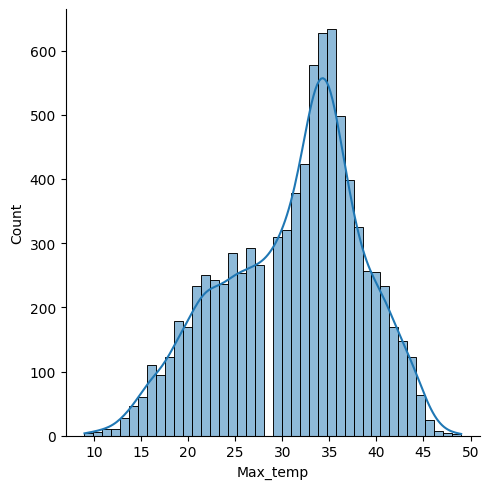

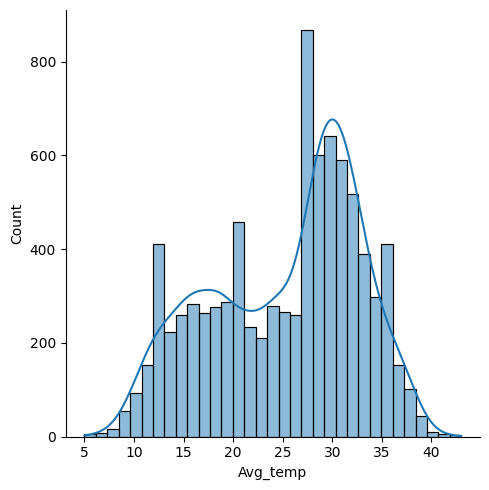

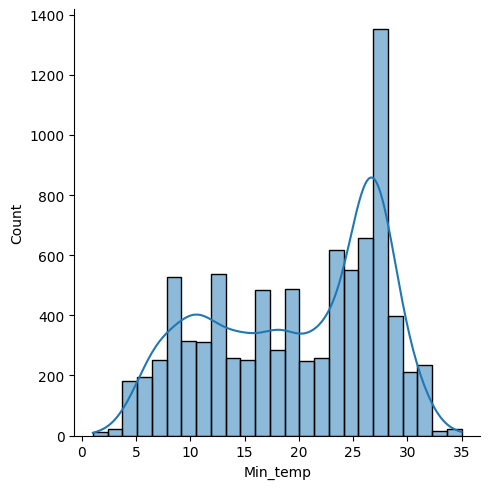

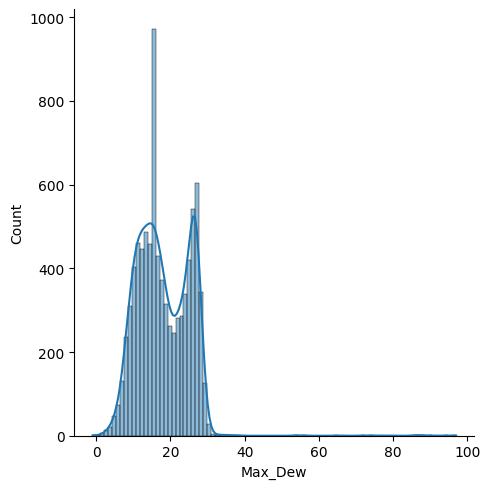

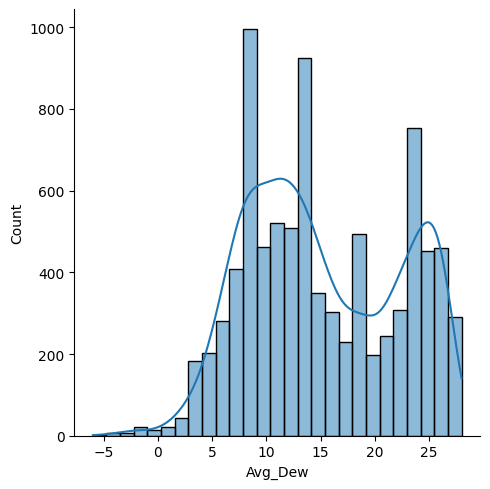

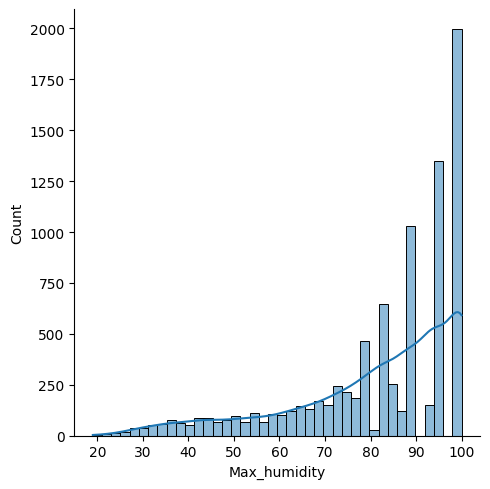

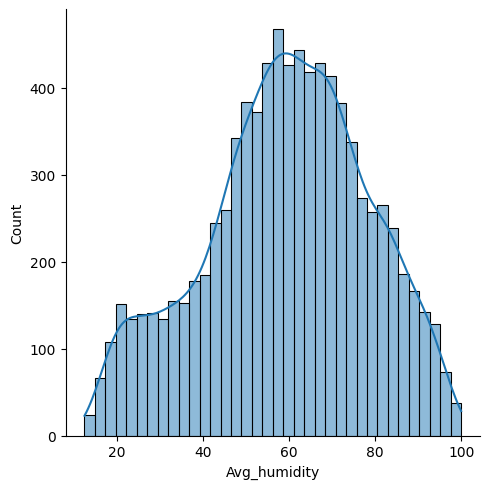

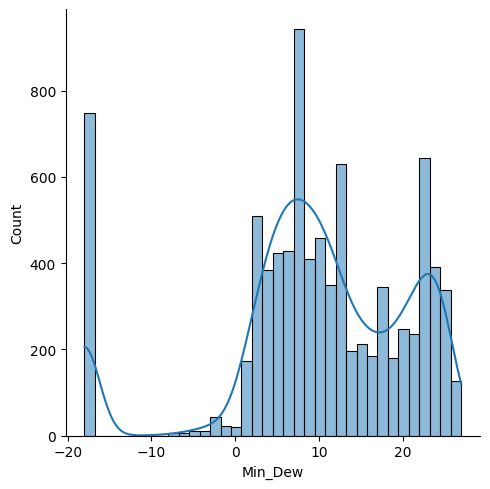

In [20]:
unique_features = []
for i in T1Features:
    unique_features.append(i)
for i in T2Features:
    if i not in unique_features:
        unique_features.append(i)

for i in unique_features:
    sns.displot(data[i],kde= True)


# Inferences from the Graphs about temperature data of Delhi.

**Max_temp Distribution:**

    - Unimodal with right skew, peaking around 35°C.
    - Indicates generally high maximum temperatures with fewer extremely high temperatures.

**Avg_temp Distribution:**

    - Bimodal with peaks around 25°C and 30°C.
    - Suggests two common average temperature ranges, indicating possible seasonal variations.

**Min_temp Distribution:**

    - Bimodal with peaks around 10°C and 25°C.
    - Reflects significant seasonal temperature variations, possibly indicating a desert or semi-arid climate.

**Max_Dew Distribution:**

    - Bimodal distribution with peaks around 50 and 75.
    - Reflects distinct periods with different moisture levels, possibly due to seasonal changes.

**Avg_Dew Distribution:**

    - Bimodal with peaks around 50 and 70 degrees.
    - Implies two main clusters of dew points, likely corresponding to different weather patterns or seasons.

**Min_Dew Distribution:**

    - Multimodal distribution with peaks around 0, 50, and 70.
    - Indicates dry conditions at times (peak around 0) and higher moisture levels at others (peaks around 50 and 70).

**Max_Humidity Distribution:**

    - Right-skewed with a sharp increase towards 100%.
    - Suggests frequent high humidity, likely indicating a humid climate.

**Avg_Humidity Distribution:**

    - Approximately normal with a slight right skew, peaking around 60%.
    - Suggests average humidity is often high, indicative of a humid environment.
    

**Conclusion:**

The temperature and humidity distributions suggest Delhi experiences a humid climate with significant seasonal variations. High maximum temperatures and wide-ranging averages indicate a climate that varies from very hot summers to cooler winters, distinct rainy and dry periods, consistent with tropical and semi-arid influences.

In [21]:
# We will be using following models on our data for predictions: 
# 1) Linear Regression
# 2) Ridge Regression
# 3) Random Forest
# 4) Support Vector Machines

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# We will be only using 15 years data out of the 23 years we have
# to train and look at scores of the model
# and after chosing a model we will run on the remaining 8 years.

def predictions(dataframe, model, features, target):
    X = dataframe[features][:5437]
    Y = dataframe[f"{target}"][:5437]
    # print(Y.shape) was added to debug error
    
    # split the data in training and testing... 80/20 split.
    x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # good reference ;)
    
    # print(x_train.shape, y_test.shape) was added to debug error
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    # Evaluate the performance of the model

    # R2: variance of the target explained by the features. 
    # How well the model fits the data. The Higher the  better
    r2 = r2_score(y_test,y_pred)

    # MSE: Average Squared distance between the predicted and actual values. Lower is better 
    mse = mean_squared_error(y_test,y_pred)

    # MAE: Average absolute distance between the predicted and actual values. Lower is better
    mae = mean_absolute_error(y_test,y_pred)

    print("Evaluating the model....")
    print(f"R2 score: {r2}\nMean Squared Error: {mse}\nMean absolute error: {mae}")
    


#### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Checking for Next_day_max
predictions(data1,model,T1Features,Target1)

# for Next_day_min
print("****************")
predictions(data2,model,T2Features,Target2)

Evaluating the model....
R2 score: 0.9149362728355641
Mean Squared Error: 4.564732302077484
Mean absolute error: 1.5712886747650021
****************
Evaluating the model....
R2 score: 0.9609160709548494
Mean Squared Error: 2.454631762385006
Mean absolute error: 1.1237473545550731


#### Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=.1)
# Checking for Next_day_max
predictions(data1,model,T1Features,Target1)

# for Next_day_min
print("****************")
predictions(data2,model,T2Features,Target2)

Evaluating the model....
R2 score: 0.9149362948868921
Mean Squared Error: 4.564731118748082
Mean absolute error: 1.5712891052273463
****************
Evaluating the model....
R2 score: 0.9609160732140639
Mean Squared Error: 2.4546316204970235
Mean absolute error: 1.1237475282542868


#### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# Checking for Next_day_max
predictions(data1,model,T1Features,Target1)

# for Next_day_min
print("****************")
predictions(data2,model,T2Features,Target2)

Evaluating the model....
R2 score: 0.9094091822188948
Mean Squared Error: 4.861329805095997
Mean absolute error: 1.6350373774509803
****************
Evaluating the model....
R2 score: 0.9547475373761709
Mean Squared Error: 2.842041084310417
Mean absolute error: 1.209169588147759


#### SVM Model

In [26]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
# Checking for Next_day_max
predictions(data1,model,T1Features,Target1)

# for Next_day_min
print("****************")
predictions(data2,model,T2Features,Target2)

Evaluating the model....
R2 score: 0.624645459211935
Mean Squared Error: 20.142463235294116
Mean absolute error: 2.842830882352941
****************
Evaluating the model....
R2 score: 0.5957318411707737
Mean Squared Error: 25.389705882352942
Mean absolute error: 2.582720588235294


### **PS: The error and Score may vary each run so values may not match this initial Evaluation metrics values**

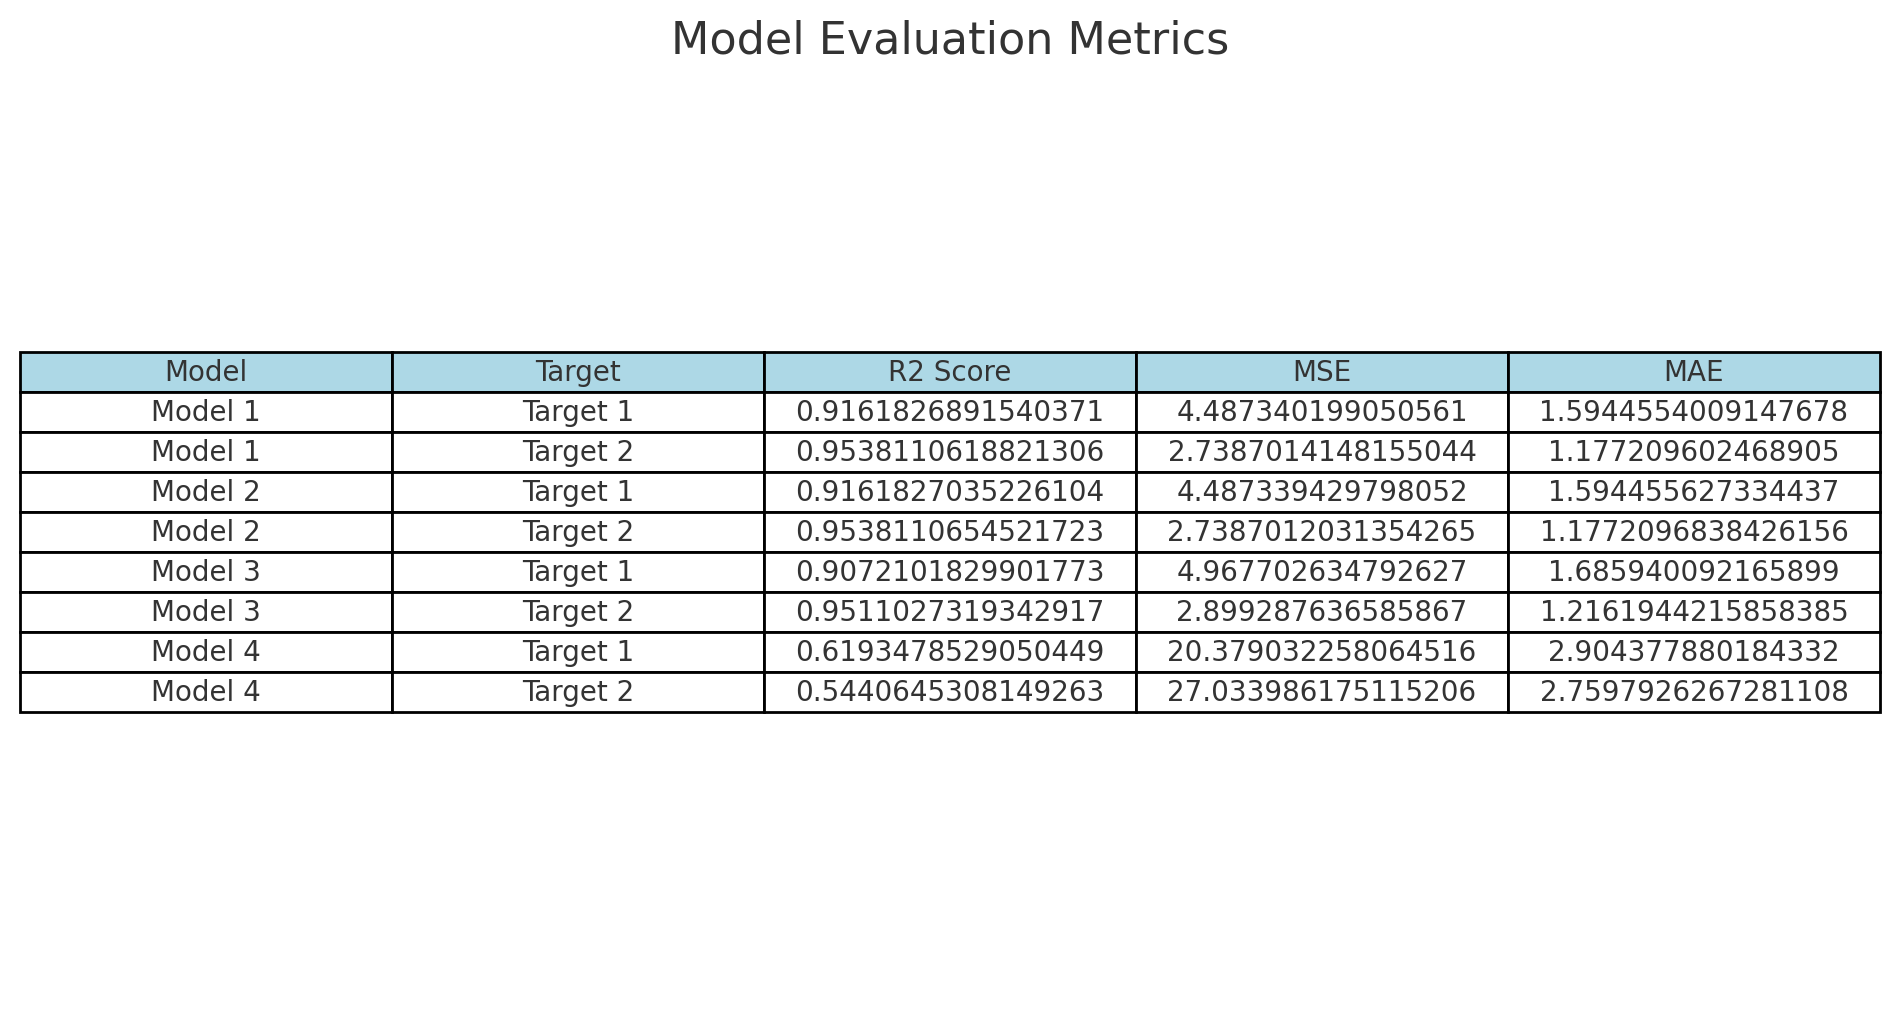

#### **Conclusion:**


Model 1 and Model 2, i.e Linear Regression and Ridge Regression, gave us the best results. So, we can conclude our features and target have a linear relation between them hence why it outperformed Non Linear regression Techniques.


In [27]:
# Choose either of the model

prediction_max_model = Ridge(alpha=.4) # change alpha to fine tune the model
prediction_min_model = Ridge(alpha=.3)
#Checking for Next_day_max
print(f"Results for {Target1}:")
predictions(data1,prediction_max_model,T1Features,Target1)

# for Next_day_min
print(f"\n****************\nResults for {Target2}:")
predictions(data2,prediction_min_model,T2Features,Target2)

# Evaluating the model....
# R2 score: 0.9161827035226104
# Mean Squared Error: 4.487339429798052
# Mean absolute error: 1.594455627334437
# ****************
# Evaluating the model....
# R2 score: 0.9538110654521723
# Mean Squared Error: 2.7387012031354265
# Mean absolute error: 1.1772096838426156
 
# above is our old Stats using this model. We see we get better 
# R2 score after changing alpha, so we can select different value 
# and settle for the one we satisfied with.


Results for NextDay_Max:
Evaluating the model....
R2 score: 0.9149363610235148
Mean Squared Error: 4.5647275696915335
Mean absolute error: 1.5712903965650944

****************
Results for NextDay_Min:
Evaluating the model....
R2 score: 0.96091607772165
Mean Squared Error: 2.454631337402047
Mean absolute error: 1.1237478756912804


In [28]:
# Looking at predictions on rest of data

test_data_max = data1.tail(3202).copy()
test_data_min = data2.tail(3202).copy()


X = test_data_max[T1Features]
actual_max = test_data_max[f"{Target1}"]

Y = test_data_min[T2Features]
actual_min = test_data_min[f"{Target2}"]

pred_max = prediction_max_model.predict(X)
pred_min = prediction_min_model.predict(Y)


test_data_max["Predicted Max"] = pred_max
test_data_min["Predicted Min"] = pred_min

test_data_max["Predicted Max"]= test_data_max["Predicted Max"].round()
test_data_min["Predicted Min"]= test_data_min["Predicted Min"].round()


In [29]:
print(f"MSE: {mean_squared_error(test_data_max["NextDay_Max"], test_data_max["Predicted Max"])}\nMAE: {mean_absolute_error(test_data_max["NextDay_Max"], test_data_max["Predicted Max"])}")

MSE: 5.044659587757652
MAE: 1.5893191755153029


<Axes: xlabel='Date'>

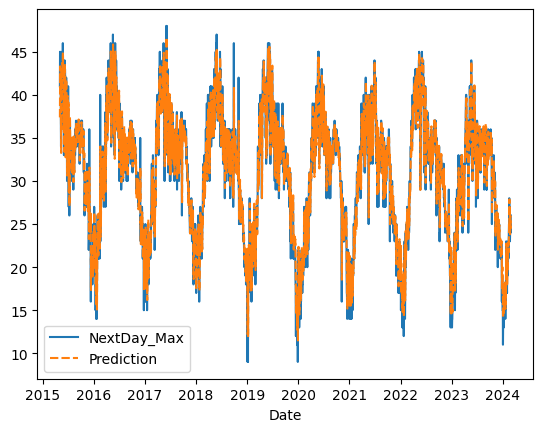

In [30]:
df = {"NextDay_Max":test_data_max["NextDay_Max"],"Prediction":pred_max}
df = pd.DataFrame(df)
sns.lineplot(df)

##### What can we tell?

We can see significant overlap in the graph which tells us that our predictions match alot with our actual values of the remaining years.

In [31]:
# Values needed for predictions: 
# for Next Day Max temp: ['Max_temp', 'Avg_temp', 'Min_temp', 'Max_Dew', 'Avg_Dew','Max_humidity', 'Avg_humidity']
# for Next Day Min Temp: ['Max_temp', 'Avg_temp', 'Min_temp', 'Max_Dew', 'Avg_Dew', 'Min_Dew','Max_humidity']

# Making it user friendly
# we keep the input in float
def get_input(prompt):
    return float(input(prompt))

# Collecting today's weather data from the user for prediction
max_temp = get_input("Enter today's Max Temp: ") # enter in Celcius
avg_temp = get_input("Enter today's Avg Temp: ") # enter in Celcius
min_temp = get_input("Enter today's Min Temp: ") # enter in Celcius
max_dew = get_input("Enter today's Max Dew: ") # enter in Celcius
avg_dew = get_input("Enter today's Avg Dew: ") # enter in Celcius
min_dew = get_input("Enter today's Min Dew: ") # enter in Celcius
max_humidity = get_input("Enter today's Max Humidity: ") # use %  amt
avg_humidity = get_input("Enter today's Avg Humidity: ") # use % amt

next_day_max_temp_features = np.array([[max_temp, avg_temp, min_temp, max_dew, avg_dew, max_humidity, avg_humidity]])
next_day_min_temp_features = np.array([[max_temp, avg_temp, min_temp, max_dew, avg_dew, min_dew, max_humidity]])

p1 = prediction_max_model.predict(next_day_max_temp_features)
p2 = prediction_min_model.predict(next_day_min_temp_features)


prediction_dict = {
    "MAX TEMP": int(p1[0]),
    "MIN TEMP": int(p2[0])
}

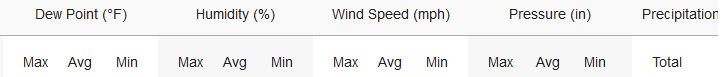                  


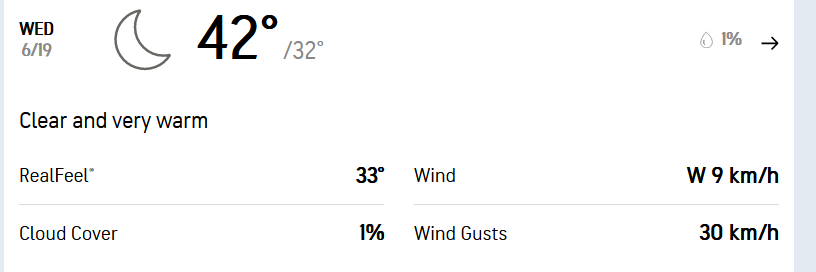
- Avg temp is 37 °C 
- Max Dew is 21.1°C
- Avg Dew is 19.0°C
- Min Dew is 17.2°C 


In [32]:
# Tested for today's values (19 june to predict next day's Max and Min) and compared with weather forecasting websites.
print(f"The prediction results are:\nTomorrow's Maximum Temperature: {prediction_dict["MAX TEMP"]}\nTomorrow's Minimum Temperature: {prediction_dict["MIN TEMP"]}")

The prediction results are:
Tomorrow's Maximum Temperature: 42
Tomorrow's Minimum Temperature: 31


As per the website: The forcast is 

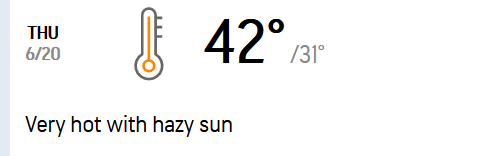